# ON & OFF zones notebook 

In [1]:
#Imports 

import numpy as np
from numpy import random
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math
from scipy import interpolate
import sys 
from re import search
from astropy.io import fits
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude
import glob
from datetime import datetime

In [2]:
#Root directory of the 4LAC-RD2 catalogue 
fits_image_filename_1 = 'C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/table-4LAC-DR2-h.fits'
fits_image_filename_2 = 'C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/table-4LAC-DR2-l.fits'

#Import data
HighLAT = fits.getdata(fits_image_filename_1) #  np.ndarray
LowLAT = fits.getdata(fits_image_filename_2)
header = fits.getheader(fits_image_filename_1)
header2=fits.getheader(fits_image_filename_2)

#Opening data
hdul = fits.open(fits_image_filename_1)
hdul2 = fits.open(fits_image_filename_2)

#Get names of all sources in the catalogue
NamesH=np.array(HighLAT["Source_Name"])
NamesL=np.array(LowLAT["Source_Name"])


In [3]:
HighLAT.columns

ColDefs(
    name = 'Source_Name'; format = '18A'
    name = 'DataRelease'; format = 'I'; null = 16959
    name = 'RAJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'DEJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLON'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLAT'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Signif_Avg'; format = 'E'; disp = 'F8.3'
    name = 'Flux1000'; format = 'E'; unit = 'ph cm-2 s-1'; disp = 'E10.4'
    name = 'Unc_Flux1000'; format = 'E'; unit = 'ph cm-2 s-1'; disp = 'E10.4'
    name = 'Energy_Flux100'; format = 'E'; unit = 'erg cm-2 s-1'; disp = 'E10.4'
    name = 'Unc_Energy_Flux100'; format = 'E'; unit = 'erg cm-2 s-1'; disp = 'E10.4'
    name = 'SpectrumType'; format = '17A'
    name = 'PL_Index'; format = 'E'; disp = 'F8.4'
    name = 'Unc_PL_Index'; format = 'E'; disp = 'F8.4'
    name = 'Pivot_Energy'; format = 'E'; unit = 'MeV'; disp = 'F10.2'
    name = 'LP_Index'; format = 'E'; disp = 'F8.4'
    nam

In [4]:
HRED = np.array(HighLAT["Redshift"])
LRED=np.array(LowLAT["Redshift"])

In [5]:
#Root directoy of all raw light curves
path_of_the_directory= "C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/"

data_files = []
file_names = []

#Root directory to later save OFF & ON time seriesonce  the list of OFF & ON sources is made
Saving_Folder_adress= "C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/"

#Storing in a list the adresses of all the data files in the notebook

for filename in os.listdir(path_of_the_directory):
    f = os.path.join(path_of_the_directory,filename)
    if os.path.isfile(f):
        data_files.append(f)
        file_names.append(filename)
        
                              
Source_names=file_names.copy()

#Changing the names of data files and removing strings - to find matches between available data and the 4LAC-DR2 catalogue
for i in range(len(file_names)): 
    
    Source_names[i]=Source_names[i].replace('.csv','')
    Source_names[i]=Source_names[i].replace('.txt','')
    Source_names[i]=Source_names[i].replace('LC_4FGL','4FGL ')
    Source_names[i]=Source_names[i].replace('LC_4FGL','4FGL ')

NamesH=HighLAT["Source_Name"]
NamesL=LowLAT["Source_Name"]

for i in range(len(NamesH)):
    
    NamesH[i]=NamesH[i].replace('.0','')
    NamesH[i]=NamesH[i].replace('.1','')
    NamesH[i]=NamesH[i].replace('.2','')
    NamesH[i]=NamesH[i].replace('.3','')
    NamesH[i]=NamesH[i].replace('.4','')
    NamesH[i]=NamesH[i].replace('.5','')
    NamesH[i]=NamesH[i].replace('.6','')
    NamesH[i]=NamesH[i].replace('.7','')
    NamesH[i]=NamesH[i].replace('.8','')
    NamesH[i]=NamesH[i].replace('.9','')
    
for i in range(len(NamesL)):
    
    NamesL[i]=NamesL[i].replace('.0','')
    NamesL[i]=NamesL[i].replace('.1','')
    NamesL[i]=NamesL[i].replace('.2','')
    NamesL[i]=NamesL[i].replace('.3','')
    NamesL[i]=NamesL[i].replace('.4','')
    NamesL[i]=NamesL[i].replace('.5','')
    NamesL[i]=NamesL[i].replace('.6','')
    NamesL[i]=NamesL[i].replace('.7','')
    NamesL[i]=NamesL[i].replace('.8','')
    NamesL[i]=NamesL[i].replace('.9','')
    
NamesH = np.array(NamesH.reshape((len(NamesH),1)))
NamesL = np.array(NamesL.reshape((len(NamesL),1)))
NamesL=NamesL.flatten()
NamesH=NamesH.flatten()

#Create arrays with right angle and declination values for all 4LAC-DR2 sources 
RAJH=HighLAT["RAJ2000"]
DEJH=HighLAT["DEJ2000"]
RAJL=LowLAT["RAJ2000"]
DEJL=LowLAT["DEJ2000"]


In [6]:
#Obtaining Right Angle and Declination values for all available sources data in the 4LAC-DR2 catalogue 
HRED = np.array(HighLAT["Redshift"])
LRED=np.array(LowLAT["Redshift"])
HR=[]
LR=[]
Source_idx_test=[]
Present_sources_test=[]
Source_names_test=['4FGL J2245+1544','4FGL J2204+0438','4FGL J1751+0938','4FGL J1534+0131','4FGL J0206-1151',
                   '4FGL J0152+0147','4FGL J0640-1253',
                   '4FGL J0148+0127','4FGL J0948+0022','4FGL J1006-2159','4FGL J1104+0730','4FGL J1058+2817'
                  ]


gg=[]
for i in range(len(Source_names_test)):
        
    a = np.where(NamesH==Source_names_test[i])
    a=a[0]
    
    if len(a) !=0 :
        HR.append(HRED[a])
        Source_idx_test.append(i)
        gg.append(a)
        Present_sources_test.append(Source_names_test[i])
    a = np.where(NamesL==Source_names_test[i])
    a=a[0]
    
    if len(a) !=0 :
        LR.append(LRED[a])
        Source_idx_test.append(i)
        gg.append(a)
        Present_sources_test.append(Source_names_test[i])
            


In [7]:
HR=np.hstack(HR)
print(np.array(HR))
print(Present_sources_test)
print(np.array(LR))

[0.5965   0.027    0.322    1.428    1.663    0.08     0.94     0.585
 0.33     0.630348 0.4793  ]
['4FGL J2245+1544', '4FGL J2204+0438', '4FGL J1751+0938', '4FGL J1534+0131', '4FGL J0206-1151', '4FGL J0152+0147', '4FGL J0640-1253', '4FGL J0148+0127', '4FGL J0948+0022', '4FGL J1006-2159', '4FGL J1104+0730', '4FGL J1058+2817']
[[0.135]]


In [8]:
#Opening Icecube data - Detected Neutrinos
df= pd.read_csv("C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/AllNeutrinos.csv")
# df= pd.read_csv("C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/AllNeutrinos - Gold.csv")
neutrino_energy=df["Energy"]

In [9]:
#Obtaining Right Angle and Declination values for all available sources data in the 4LAC-DR2 catalogue 

RA=[]
DE= []
Source_idx=[]
Present_sources=[]
gg=[]
for i in range(len(Source_names)):
        
    a = np.where(NamesH==Source_names[i])
    a=a[0]
    
    if len(a) !=0 :
        RA.append(RAJH[a])
        DE.append(DEJH[a])
        Source_idx.append(i)
        gg.append(a)
        Present_sources.append(Source_names[i])
    a = np.where(NamesL==Source_names[i])
    a=a[0]
    
    if len(a) !=0 :
        RA.append(RAJL[a])
        DE.append(DEJL[a])
        Source_idx.append(i)
        gg.append(a)
        Present_sources.append(Source_names[i])
            
RA=np.array(RA)
DE=np.array(DE)

In [10]:
HRED

array([ -inf,  -inf, 1.106, ...,  -inf, 0.096,  -inf], dtype=float32)

In [11]:
MJD=[59759,59757,59754,59723,59714,59708,59700,59695,59694,59694,
     59691,59675,59655,59644,59642,59641,59636,59634,59616,59616,0,
     59612,59595,59750,59750,59557,59544,59542,59536,59535,59511,
     59480,59438,59426,59365,59374,59354,59351,59345,59295,
     59259,59256,59206,59205,59193,59184,59174,59169,59169,59168,
     59144,59137,59130,59122,59119,59119,59114,59109,59104,59068,
     59059,59021,59016,59015,59000,58993,58982,58965,58961,
     58950,58907,58869,58866,58858,58850,58833,58822,58810,
     58807,58758,58749,58749,58715,58695,58677,58669,58664,58654,
     58607,58415,58370,58064,58019,57834,57733,57607,57601]

In [12]:
len(MJD)

97

In [13]:
RAN=df["RA [deg]"]
DEN=df["Dec [deg]"]
ErrorDir=[]
Error50=df["Error50 [arcmin]"]
Error90=df["Error90 [arcmin]"]
#Get spatial position error from the IceCube detection 
for i in range(len(df)):
    if Error90[i]>Error50[i]:
        ErrorDir.append(Error90[i])
    else:
        ErrorDir.append(Error50[i])

In [14]:

RAN=df["RA [deg]"]
DEN=df["Dec [deg]"]
ErrorDir=[]
Error50=df["Error50 [arcmin]"]
Error90=df["Error90 [arcmin]"]
#Get spatial position error from the IceCube detection 
for i in range(len(df)):
    if Error90[i]>Error50[i]:
        ErrorDir.append(Error90[i])
    else:
        ErrorDir.append(Error50[i])
print(RAN)

0     163.9199
1     165.5900
2     224.1200
3      47.2000
4     224.0300
        ...   
91     77.2853
92     98.3268
93     46.5799
94    122.7980
95    214.5440
Name: RA [deg], Length: 96, dtype: float64


In [15]:
def rescale01(xt):
    
    offset=(xt-np.min(xt))
    return offset/np.max(offset)

In [16]:
def radec_galactic(c_icrs):
    #Convert  Right Ascension(RA)- Declination coordinates to galactic coordinates for Fermi sources
    gaLon=c_icrs.galactic.l.wrap_at(180*u.deg).radian  # galactic Longitude Radians
    gaLat=c_icrs.galactic.b.wrap_at(180*u.deg).radian  # galactic Latitude Radians
    gaLatDeg=c_icrs.galactic.b.wrap_at(180*u.deg).degree  # galactic Latitude in degrees
    return gaLon,gaLat,gaLatDeg

In [17]:
#Removing any ON zones that includes more than 1 source and also intersecting ON zones - to be guarantee quality of ON data
def remove_duplicate(array,array2):

    u, c = np.unique(array, return_counts=True)
    dup = u[c > 1]

    dup_idx=[]
    for i in range(len(dup)):

        dup_idx.append(np.where(dup[i]==array))
        
    dup_idx=np.hstack(dup_idx)
    dup_idx=dup_idx.flatten()

    array= np.delete(array,dup_idx)
    array2=np.delete(array2,dup_idx)
    return array,array2

In [18]:
 ## ICE CUBE BLIND ZONE

MM= [(i,j) for i in np.arange(-np.pi,np.pi,0.01) for j in np.arange(-np.pi/2,np.pi/2,0.01) if (j<Angle('-22d').radian+0.01) and (j>Angle('-22d').radian-0.01)] #(i<gaLonF[indDeclimit]) and (j<gaLatF[indDeclimit])]

newcoord=SkyCoord(ra=list(zip(*MM))[0]*u.radian,dec=list(zip(*MM))[1]*u.radian, frame='icrs')
newcoord.transform_to('fk5') 

#convert MM
RedgaLonF,RedgaLatF,RedgaLatFd=radec_galactic(newcoord)


# Solve oscillating boundaries
kest=len(RedgaLonF)
RedgaLonF=RedgaLonF[0:kest:2]
RedgaLatF=RedgaLatF[0:kest:2]

# Insert lower point extreme in ORDdegaLonF 

codino=np.where(RedgaLonF<=-np.pi/2-0.02)[0][-1]#for corrected projection
RedgaLonF=np.insert(RedgaLonF,codino+1,RedgaLonF[codino])#RedgaLonF[np.argmin(RedgaLatF)])
RedgaLatF=np.insert(RedgaLatF,codino+1,np.radians(-90))#RedgaLatF[np.argmin(RedgaLatF)])

purgedX=RedgaLonF[0:kest]
purgedX=purgedX[0:len(purgedX)]
purgedY=RedgaLatF[0:kest]
purgedY=purgedY[0:len(purgedY)]

a= np.argmin(purgedY)
purgedY=np.delete(purgedY,a)
purgedX=np.delete(purgedX,a)

class Fermi:
    def __init__(self,Lo,La):
        self.Lon = Lo
        self.Lat = La
        

def RADEC_to_LoLaGal(sources,RA,DE):
    
    c_icrs=SkyCoord(ra=RA*u.degree, dec=DE*u.degree, frame='icrs')
    c_icrs.transform_to('fk5')

    #To galactic coordinates
    gaLonF,gaLatF,gaLatFd=radec_galactic(c_icrs)
    
    #Position Sources
    center = SkyCoord(l=np.asarray(gaLonF)*u.rad, b=np.asarray(gaLatF)*u.rad, frame='galactic',unit='rad')
    #In Lon/Lat
    Flist=np.asarray([Fermi(gaLonF[i],gaLatF[i]) for i in range(0,len(sources))])
    #Add Name in Flist!
    temp=list(map(lambda x,y: setattr(x,'Name', y),Flist,sources))
    
    return center,Flist
    

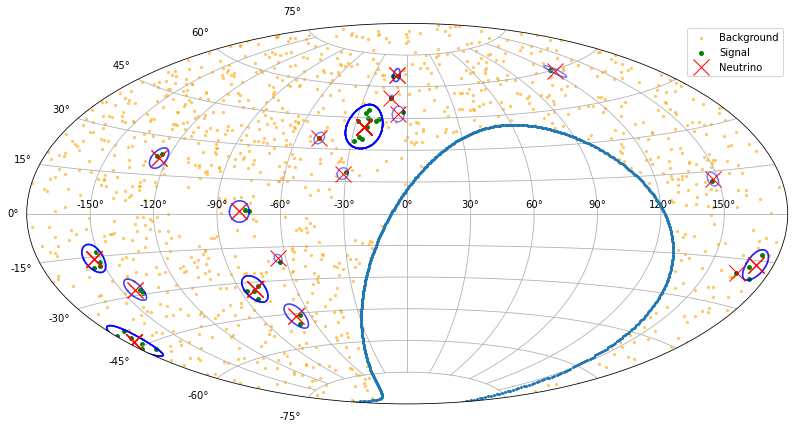

In [19]:
allN,NN2= RADEC_to_LoLaGal(df,RAN,DEN)
centerF,Flist=RADEC_to_LoLaGal(Present_sources,RA,DE)
fLon=lambda x: x.Lon
fLat=lambda x: x.Lat

rad_rad=[]
matchedNeu=[]
signal=[]
idN=[]
idd=[]
doubles=[]

for i in range(len(df)):
    
    arcmin_to_deg=0.0166667

    b =arcmin_to_deg*ErrorDir[i]
    rad_rad.append(np.deg2rad(b))
    

phi = np.linspace(0, 2.*np.pi,100 )#5 or more points
xh = np.asarray(list(map(lambda x: x.Lon,Flist)))
yh = np.asarray(list(map(lambda x: x.Lat,Flist)))
gx = list(map(fLon,NN2))
gy = list(map(fLat,NN2))

#Finding which sources belong to ON or OFF class
#Is the source inside the 'spatial error in detection circle' of the neutrino?
for kk in range(0,len(df)):

    m = rad_rad[kk] 

    for i in range(len(Present_sources)):

        #put condition on x and y to find closest point to gamma ray source ,
#         then to compare distances from circle point to neutrino (NN2) and the sources to neutrino (nn2)
        gg = np.sqrt((gx[kk]-xh[i])**2 + (gy[kk]-yh[i])**2)
        if gg<m and i not in idd: #second condition is to avoid double counting of ON source due to intersecting error detection circles
            idN.append(kk)
            idd.append(i)
            doubles.append([kk,i])

# for kk in range(0,len(df)):

#     m = rad_rad[kk] 

#     for i in range(len(Present_sources)):

#         #put condition on x and y to find closest point to gamma ray source ,
# #         then to compare distances from circle point to neutrino (NN2) and the sources to neutrino (nn2)
#         gg = np.sqrt((gx[kk]-xh[i])**2 + (gy[kk]-yh[i])**2)
#         if gg<m:
#             idN.append(kk)
#             idd.append(i)
#             doubles.append([kk,i]) 
            
            
# idd,idN = remove_duplicate(idd,idN)
# idN,idd = remove_duplicate(idN,idd)

rad_rad_filtered=[]

#
for i in range(len(idN)):
    a = idN[i]
    rad_rad_filtered.append(rad_rad[a])

p=np.arange(len(Present_sources))

#Array of indices of signal and background sources 
signal=idd
background=np.delete(p,idd)
matchedNeu=idN


fig1 = plt.figure(figsize=(15,7))
ax1 = fig1.add_subplot(111, projection="aitoff")
# ax1 = fig1.add_subplot(111) 

#For each ON zones - draw a circle with respective spatial error in detection circle 
for i in range(0,len(idN)):
    ##Drawing "regular polygons/circles" on the surface (is that an alternative way of selecting signals?)
    phi = np.linspace(0, 2.*np.pi,1000 )#5 or more points
    m = rad_rad_filtered[i]
    x = fLon(NN2[idN[i]]) + m*np.cos(phi)
    y = fLat(NN2[idN[i]]) + m*np.sin(phi)
    ax1.plot(-x, y, color="b", alpha=0.5)
    
# for i in range(0,len(df)):
#     ##Drawing "regular polygons/circles" on the surface (is that an alternative way of selecting signals?)
#     phi = np.linspace(0, 2.*np.pi,1000 )#5 or more points
#     m = rad_rad[i]
#     x = fLon(NN2[i]) + m*np.cos(phi)
#     y = fLat(NN2[i]) + m*np.sin(phi)


#Get coordinates of OFF and ON sources
bkkx = np.asarray(list(map(lambda x: x.Lon,Flist)))[background]
bkky=np.asarray(list(map(lambda x: x.Lat,Flist)))[background]
sgx= np.asarray(list(map(lambda x: x.Lon,Flist)))[signal]
sgy = np.asarray(list(map(lambda x: x.Lat,Flist)))[signal]
bkkx=-bkkx
sgx=-sgx
gx = list(map(fLon,NN2[idN]))
gy=list(map(fLat,NN2[idN]))

for i in range(len(gx)):
    gx[i]=-gx[i]


#Filtering any sources in the Icecube Blind zone    
idx=[] 
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

for i in range(len(bkky)):
    a=find_nearest(-purgedX,bkkx[i])
    b = purgedY[a]
    if bkky[i]<b : # and bky[i]>min(purgedY):
        idx.append(i)
        

#Make the 'aitoff' projection
ax1.scatter(bkkx, bkky,c='orange', s=5, alpha=0.5,label="Background")
ax1.scatter(sgx, sgy,c='green', s=15,alpha=1,label="Signal")
ax1.plot(-purgedX,purgedY,'o', markersize=2)
ax1.grid()
ax1.plot(gx, gy, 'rx', markersize=16, alpha=0.99,label='Neutrino')
ax1.legend();

In [20]:
MJD2=[]
array=[]
array_back=[]
energy=[]
for i in range(len(idN)):
    a=idN[i]
    MJD2.append(MJD[a])
    energy.append(neutrino_energy[a])
for i in range(len(sgx)):
    aa=signal[i]
    array.append([Source_names[aa],MJD2[i]])
    
for i in range(len(bkkx)):
    idx=background[i]
    array_back.append([Source_names[idx]])  


In [21]:
path_of_the_directory= "C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/Interpolated data/"
data_files=[]
for filename in os.listdir(path_of_the_directory):
    f = os.path.join(path_of_the_directory,filename)
    if os.path.isfile(f):
        data_files.append(f)
        file_names.append(filename)
        

In [22]:
pente_energy_ratio=[0.3818,0.409,0.409,0.5132,0.405,0.45658,0.3827,0.4188]
print(np.mean(pente_energy_ratio))
b=0
slope_indexVSflux=[]

0.42201


In [26]:
idN_unique=np.unique(idN)
MJD2_unique=np.unique(MJD2)
energy_unique=np.unique(energy)
data=np.zeros((1,len(idN_unique),37))

b+=1
for ll in range(b,b+1):
    ON_neutrino_energy=[]
    neutrino=MJD2_unique[ll]
    count=0
    source_id=[]
    for i in range(len(MJD2)):
        if array[i][1]==neutrino:
            
            count+=1
            aa=signal[i]
            source_id.append(aa)
            ON_neutrino_energy.append(energy[i])
    neutrino_data_array=np.zeros((count,3,37)  )  
    for i in range(len(source_id)):
        source=source_id[i]
        source_data=pd.read_csv(data_files[source],index_col=[0])
 
        source_data.columns=['MJD','Flux','Delta Flux','Photon Index','Delta Index','TS','fratio']
        time=np.array(source_data['MJD'])
        flux=np.array(source_data['Flux'])
        photon_idx=np.array(source_data['Photon Index']) 
        flux_idx=np.array(source_data['Photon Index'])*np.array(source_data['Flux'])
#         neutrino_data_array[i]=photon_idx
        neutrino_data_array[i][0]=flux
        neutrino_data_array[i][1]=photon_idx
        neutrino_data_array[i][2]=time
    
print(file_names[aa]) 
print(source_id)
print(neutrino)

redshift =np.append(HRED,LRED)

LC_4FGLJ1504+1029.txt
[795]
58715


source:  C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/Interpolated data/LC_4FGLJ0005+3824.txt


Text(0.5, 1.0, 'OFF: Photon Index vs time')

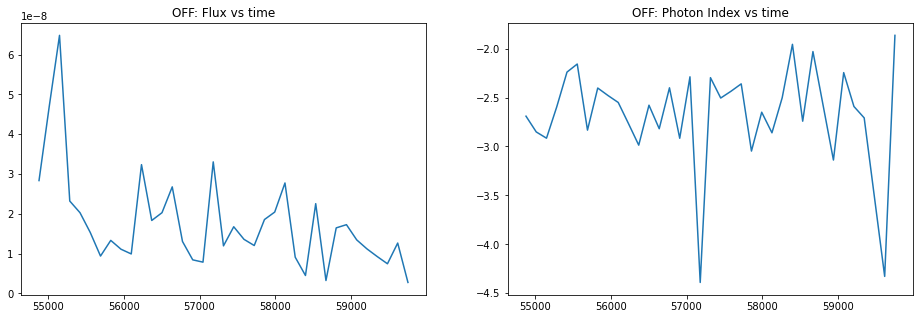

In [27]:
off_data_array=np.zeros((4,37))
b+=1
for i in range(b,b+1):
    source=background[i]
    source_data=pd.read_csv(data_files[source],index_col=[0])

    source_data.columns=['MJD','Flux','Delta Flux','Photon Index','Delta Index','TS','fratio']
    time=np.array(source_data['MJD'])
    flux=np.array(source_data['Flux'])
    photon_idx=np.array(source_data['Photon Index']) 
    flux_idx=np.array(source_data['Photon Index'])*np.array(source_data['Flux'])
    fratio=np.array(source_data['fratio'])
    off_data_array[0]=time
    off_data_array[1]=photon_idx
    off_data_array[2]=flux
    off_data_array[3]=fratio
print("source: ",data_files[source])    
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(off_data_array[0],off_data_array[2])
plt.title('OFF: Flux vs time')
plt.subplot(1,2,2)
plt.plot(off_data_array[0],off_data_array[1])
plt.title('OFF: Photon Index vs time')

# print("redshift: ",redshift[source_id[0]])
# print("Neutrino energy: ",ON_neutrino_energy[0])
# dd=np.argmax(neutrino_data_array[0][1])
# cc=np.argmin(neutrino_data_array[0][0])
# print(time[cc])
# print("Max: ",neutrino_data_array[0][1][dd])
# print(source_id) 
# print(neutrino)
# plt.subplot(2,2,3)
# plt.plot(neutrino_data_array[0][2],neutrino_data_array[0][0])
# plt.vlines(neutrino,min(neutrino_data_array[0][0]),max(neutrino_data_array[0][0]))
# plt.title('ON: Flux vs time')
# plt.subplot(2,2,4)
# plt.plot(neutrino_data_array[0][2],neutrino_data_array[0][1])
# plt.vlines(neutrino,min(neutrino_data_array[0][1]),max(neutrino_data_array[0][1]))
# plt.title('ON: Photon Index vs time')

redshift:  0.000927
Neutrino energy:  298.81 
59475.1555556
Max:  -2.11289310455


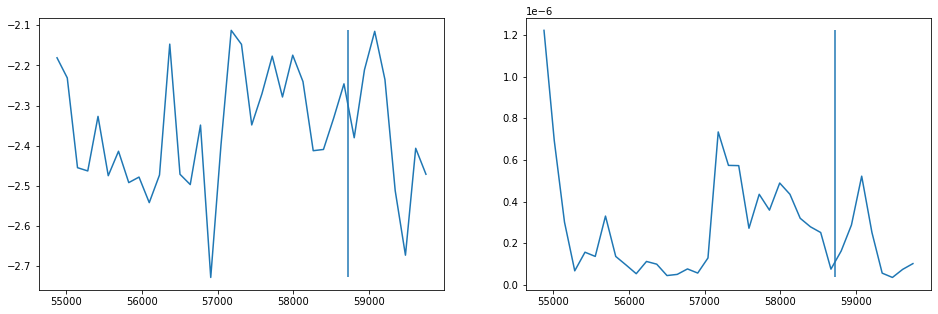

In [28]:
import ipympl
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,5))
print("redshift: ",redshift[source_id[0]])
print("Neutrino energy: ",ON_neutrino_energy[0])
dd=np.argmax(neutrino_data_array[0][1])
cc=np.argmin(neutrino_data_array[0][0])
print(time[cc])
print("Max: ",neutrino_data_array[0][1][dd])
plt.subplot(1,2,1)
plt.plot(neutrino_data_array[0][2],neutrino_data_array[0][1])
plt.vlines(neutrino,min(neutrino_data_array[0][1]),max(neutrino_data_array[0][1]))
plt.subplot(1,2,2)
plt.plot(neutrino_data_array[0][2],neutrino_data_array[0][0])
plt.vlines(neutrino,min(neutrino_data_array[0][0]),max(neutrino_data_array[0][0]))

In [118]:
idN_unique=np.unique(idN)
MJD2_unique=np.unique(MJD2)
energy_unique=np.unique(energy)
data=np.zeros((1,len(idN_unique),37))

b=12
for ll in range(b,b+1):
    ON_neutrino_energy=[]
    neutrino=MJD2_unique[ll]
    count=0
    source_id=[]
    for i in range(len(MJD2)):
        if array[i][1]==neutrino:
            
            count+=1
            aa=signal[i]
            source_id.append(aa)
            ON_neutrino_energy.append(energy[i])
    neutrino_data_array=np.zeros((count,3,37)  )  
    for i in range(len(source_id)):
        source=source_id[i]
        source_data=pd.read_csv(data_files[source],index_col=[0])
 
        source_data.columns=['MJD','Flux','Delta Flux','Photon Index','Delta Index','TS','fratio']
        time=np.array(source_data['MJD'])
        flux=np.array(source_data['Flux'])
        photon_idx=np.array(source_data['Photon Index']) 
        flux_idx=np.array(source_data['Photon Index'])*np.array(source_data['Flux'])
#         neutrino_data_array[i]=photon_idx
        neutrino_data_array[i][0]=flux
        neutrino_data_array[i][1]=photon_idx
        neutrino_data_array[i][2]=time
    
print(source_id) 
print(neutrino)

redshift =np.append(HRED,LRED)

ValueError: could not broadcast input array from shape (36,) into shape (37,)

redshift:  2.987498
Neutrino energy:  153.96 
57720.1551852
Max:  -1.59921050072


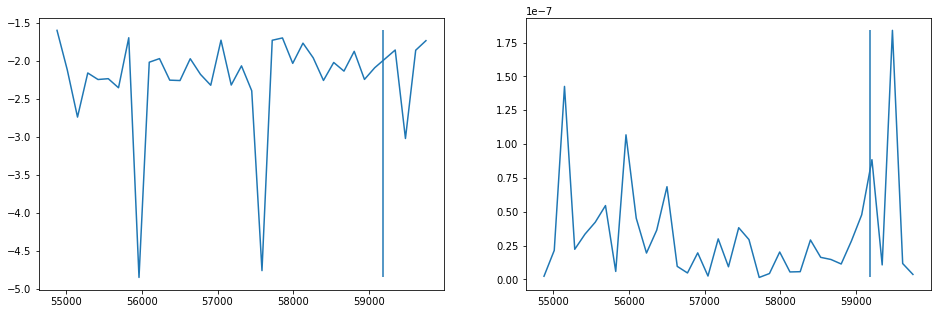

In [103]:
import ipympl
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,5))
print("redshift: ",redshift[source_id[1]])
print("Neutrino energy: ",ON_neutrino_energy[1])
dd=np.argmax(neutrino_data_array[1][1])
cc=np.argmin(neutrino_data_array[1][0])
print(time[cc])
print("Max: ",neutrino_data_array[1][1][dd])
plt.subplot(1,2,1)
plt.plot(neutrino_data_array[1][2],neutrino_data_array[1][1])
plt.vlines(neutrino,min(neutrino_data_array[1][1]),max(neutrino_data_array[1][1]))
plt.subplot(1,2,2)
plt.plot(neutrino_data_array[1][2],neutrino_data_array[1][0])
plt.vlines(neutrino,min(neutrino_data_array[1][0]),max(neutrino_data_array[1][0]))

ValueError: x and y must have same first dimension, but have shapes (37,) and (3, 37)

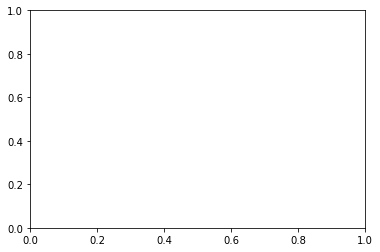

In [100]:
plt.plot(time,neutrino_data_array[2])
print("redshift: ",redshift[source_id[2]])
print("Neutrino energy: ",ON_neutrino_energy[2])
cc=np.argmin(neutrino_data_array[2])
plt.vlines(neutrino,min(neutrino_data_array[2]),max(neutrino_data_array[2]))
print(time[cc])

redshift:  1.837
Neutrino energy:  1.0517e 02 
57720.1551852


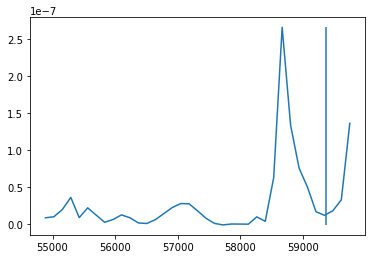

In [691]:
plt.plot(time,neutrino_data_array[3])
cc=np.argmin(neutrino_data_array[3])
print("redshift: ",redshift[source_id[3]])
print("Neutrino energy: ",ON_neutrino_energy[3])
plt.vlines(neutrino,min(neutrino_data_array[3]),max(neutrino_data_array[3]))
print(time[cc])

In [692]:
plt.plot(time,neutrino_data_array[4])
cc=np.argmin(neutrino_data_array[4])
print("redshift: ",redshift[source_id[4]])
print("Neutrino energy: ",ON_neutrino_energy[4])
plt.vlines(neutrino,min(neutrino_data_array[4]),max(neutrino_data_array[4]))
print(time[cc])

IndexError: index 4 is out of bounds for axis 0 with size 4

-inf
55695.1551852


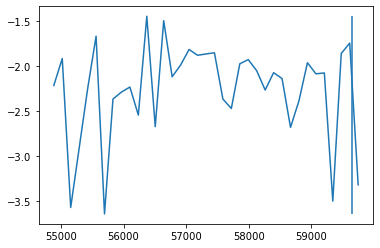

In [528]:
plt.plot(time,neutrino_data_array[5])
cc=np.argmin(neutrino_data_array[5])
print(redshift[source_id[5]])
plt.vlines(neutrino,min(neutrino_data_array[5]),max(neutrino_data_array[5]))
print(time[cc])

In [206]:
plt.plot(time,neutrino_data_array[6])
cc=np.argmin(neutrino_data_array[6])
print(redshift[source_id[6]])
plt.vlines(neutrino,min(neutrino_data_array[6]),max(neutrino_data_array[6]))
print(time[cc])

IndexError: index 6 is out of bounds for axis 0 with size 6

0.000927
57855.1551852


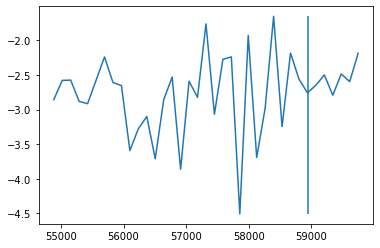

In [138]:
plt.plot(time,neutrino_data_array[7])
cc=np.argmin(neutrino_data_array[7])
print(redshift[source_id[7]])
plt.vlines(neutrino,min(neutrino_data_array[7]),max(neutrino_data_array[7]))
print(time[cc])

In [139]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

data_zoom_neutrino=np.zeros((len(signal),3,21))

kk=84

a=signal[kk]
neutrino_time=MJD2[kk]
dataframe = pd.read_csv(data_files[a],index_col=[0])

dataframe.columns=['MJD','Flux','Delta Flux','Photon Index','Delta Index','TS','fratio']
time=np.array(dataframe['MJD'])
flux=np.array(dataframe['Flux'])
photon_idx=np.array(dataframe['Photon Index'])

approx_neutrino_time=find_nearest(time,neutrino_time)
neutrino_time
# idx_neutrino_time=np.hstack(np.where(time==approx_neutrino_time))
# new_array_idx=[idx_neutrino_time]


IndexError: list index out of range